In [2]:
from pathlib import Path

figures_path = Path("figures")
figures_path.mkdir(exist_ok=True)
figures_path = figures_path / "fusion_score"
figures_path.mkdir(exist_ok=True)


FONTSIZE_TICKS = 14
LINEWIDTH_SCORES = 2.5

In [2]:
import torch
boxes = torch.rand(6, 4) * 256; boxes[:, 2:] += boxes[:, :2]
print(boxes.shape)
print(boxes)

torch.Size([6, 4])
tensor([[153.0513, 251.5396, 392.6730, 497.6835],
        [ 88.0324, 109.7783, 145.0945, 231.6766],
        [ 13.5392, 204.1091,  53.0932, 367.1135],
        [250.7794, 117.7660, 456.7112, 218.1750],
        [149.4873, 241.4650, 293.9411, 429.4395],
        [170.0076, 211.5193, 361.6205, 367.9339]])


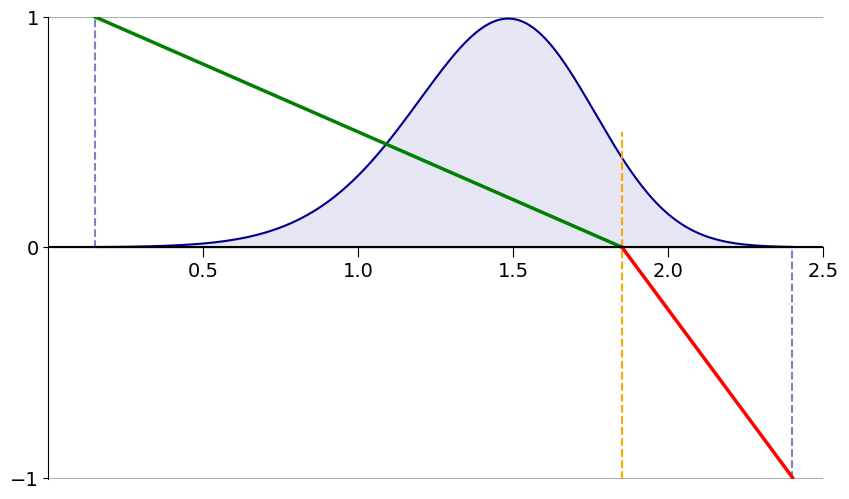

In [188]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# Parameters for the skew-normal distribution
location = 1.7   # Location (shifts the peak)
scale = 0.4      # Scale (controls the width)
alpha = -1.5      # Skewness parameter (negative for left skew)

# Generate data
x_lim_min_plot = 0
x_lim_max_plot = 2.5
x_lim_min = x_lim_min_plot + 0.15
x_lim_max = x_lim_max_plot - 0.1

x = np.linspace(x_lim_min, x_lim_max, 1000)
y = skewnorm.pdf(x, alpha, location, scale)
y /= y.max() + 0.01  # Normalize

# Threshold line
threshold = 1.85

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='darkblue')
plt.axvline(x=threshold, color='orange', linestyle='--', ymax=0.75)  # Threshold line adjusted
# Calculate the X max of the curve
x_min = x[0]
x_max = x[-1]
plt.axvline(x=x_min, color='darkblue', linestyle='--', ymin=0.5, ymax=1, alpha=0.5)  # Threshold line adjusted
plt.axvline(x=x_max, color='darkblue', linestyle='--', ymax=0.5, alpha=0.5)  # Threshold line adjusted

# Draw additional lines
plt.plot([x_lim_min, threshold], [1, 0], color='green', linestyle='-', linewidth=LINEWIDTH_SCORES)  # Line from (0,1) to (threshold,0)
plt.plot([threshold, x_lim_max], [0, -1], color='red', linestyle='-', linewidth=LINEWIDTH_SCORES)  # Line from (threshold,0) to (2.3,-1)

# Fill under the curve
plt.fill_between(x, y, color="darkblue", alpha=0.1) 

# Setting axis properties. Set X and Y ticks fontsize. Set Y to [-1, 0, 1]. From X ticks, remove the 0.
plt.xlim(x_lim_min_plot, x_lim_max_plot)
plt.ylim(-1.005, 1.001)
plt.yticks([-1, 0, 1], fontsize=FONTSIZE_TICKS)  # Set y-ticks and fontsize
plt.xticks(fontsize=FONTSIZE_TICKS)  # Set x-ticks and fontsize



# Correcting grid visibility and show x-axis ticks
plt.grid(True, axis='y')  # Enable grid only on the y-axis
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, size=FONTSIZE_TICKS*0.5)  # Show x-tick lines

# Adjust the x-axis to stay at y=0 and make y-axis visible
plt.axhline(y=0, color='black', linewidth=1.5)  # X-axis line
plt.gca().spines['bottom'].set_position('zero')  # Position x-axis at y=0
plt.gca().spines['left'].set_visible(True)  # Make the left spine visible
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine

# Adjust x-ticks to remove zero
xticks = plt.gca().get_xticks()
xticks = xticks[xticks != 0]  # Remove zero from x-ticks
plt.xticks(xticks, fontsize=FONTSIZE_TICKS)  # Set x-ticks and fontsize

plt.savefig(figures_path / 'fusion_score_feature.pdf', bbox_inches='tight')
plt.savefig(figures_path / 'fusion_score_feature.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()



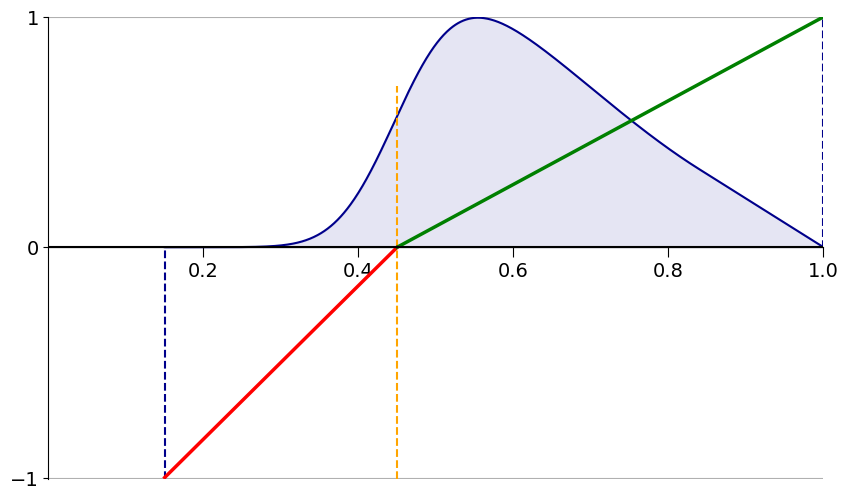

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# Generate data
offset = 0.15
x_lim_min_plot = 0
x_lim_max_plot = 1
x_lim_min = x_lim_min_plot + offset
x_lim_max = x_lim_max_plot
x = np.linspace(x_lim_min, x_lim_max, 1000)

# Approach 2: Skewed normal
alpha = 4
location = 0.45
scale = 0.25
y = skewnorm.pdf(x, alpha, location, scale)
y /= y.max() + 0.01  # Normalize

# Make y between x=0.85 and x=1 be a linear function from the value of y at x=0.85 to 0
x_from = 0.85
x_to = 1
x_values_from_to = x[(x >= x_from) & (x <= x_to)]
y_values_from_to = y[(x >= x_from) & (x <= x_to)]
slope = (0 - y_values_from_to[0]) / (x_to - x_from)
y[(x >= x_from) & (x <= x_to)] = slope * (x_values_from_to - x_from) + y_values_from_to[0]

# Threshold line
threshold = 0.45

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='darkblue')
plt.axvline(x=threshold, color='orange', linestyle='--', ymax=0.85)  # Threshold line adjusted
# Calculate the X max of the curve
x_min = x[0]
x_max = x[-1]
plt.axvline(x=x_min, color='darkblue', linestyle='--', ymin=0, ymax=0.5)  # Threshold line adjusted
plt.axvline(x=x_max, color='darkblue', linestyle='--', ymin=0.5, ymax=1)

# Draw additional lines
plt.plot([x_lim_min, threshold], [-1, 0], color='red', linestyle='-', linewidth=LINEWIDTH_SCORES)  # Line from (0,1) to (threshold,0)
plt.plot([threshold, x_lim_max], [0, 1], color='green', linestyle='-', linewidth=LINEWIDTH_SCORES)  # Line from (threshold,0) to (2.3,-1)

# Fill under the curve
plt.fill_between(x, y, color="darkblue", alpha=0.1) 

# Setting axis properties. Set X and Y ticks fontsize. Set Y to [-1, 0, 1]. From X ticks, remove the 0.
plt.xlim(x_lim_min_plot, x_lim_max_plot)
plt.ylim(-1.005, 1.001)
plt.yticks([-1, 0, 1], fontsize=FONTSIZE_TICKS)  # Set y-ticks and fontsize

# Correcting grid visibility and show x-axis ticks
plt.grid(True, axis='y')  # Enable grid only on the y-axis
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, size=FONTSIZE_TICKS*0.5)  # Show x-tick lines

# Adjust the x-axis to stay at y=0 and make y-axis visible
plt.axhline(y=0, color='black', linewidth=1.5)  # X-axis line
plt.gca().spines['bottom'].set_position('zero')  # Position x-axis at y=0
plt.gca().spines['left'].set_visible(True)  # Make the left spine visible
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine

# Adjust x-ticks to remove zero
xticks = plt.gca().get_xticks()
xticks = xticks[xticks != 0]  # Remove zero from x-ticks
plt.xticks(xticks, fontsize=FONTSIZE_TICKS)  # Set x-ticks and fontsize

plt.savefig(figures_path / 'fusion_score_logits.pdf', bbox_inches='tight')
plt.savefig(figures_path / 'fusion_score_logits.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()



In [164]:
x_from = 0.85
x_to = 1
x_values_from_to = x[(x >= x_from) & (x <= x_to)]

In [ ]:
# Other options

# # Define the exponential function y = a * exp(b * x)
# a = 1  # Scaling factor adjusted so that y starts from 0
# b = 3  # Adjust b to make sure the curve reaches near 1 at x=1
# y = a * (np.exp(b * x) - 1) / (np.exp(b) - 1)  # Normalize to ensure y is in [0,1]

# # Approach 1: Adjusted Exponential Function
# # Parameters
# c = 0.18  # Adjust this to control where the growth starts
# b = 4   # Growth rate
# y = (np.exp(b * (x - c)) - 1) / (np.exp(b * (1 - c)) - 1)
# y[x < c] = 0  # Ensuring Y is zero before X = c


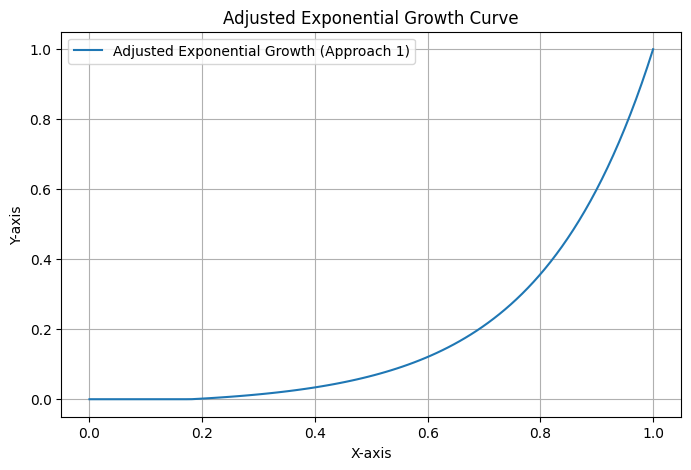

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x
x = np.linspace(0, 1, 100)

# Parameters
c = 0.18  # Adjust this to control where the growth starts
b = 5   # Growth rate

# Approach 1: Adjusted Exponential Function
y1 = (np.exp(b * (x - c)) - 1) / (np.exp(b * (1 - c)) - 1)
y1[x < c] = 0  # Ensuring Y is zero before X = c

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y1, label='Adjusted Exponential Growth (Approach 1)')
plt.title('Adjusted Exponential Growth Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()
plt.show()


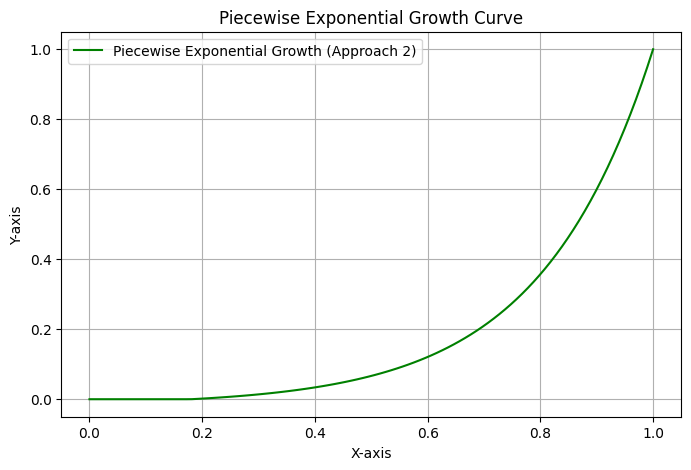

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x
x = np.linspace(0, 1, 100)

# Parameters
c = 0.18  # Point where growth starts
b = 5   # Growth rate

# Approach 2: Piecewise Function
y2 = np.where(x > c, (np.exp(b * (x - c)) - 1) / (np.exp(b * (1 - c)) - 1), 0)

# Create the plot for the piecewise function
plt.figure(figsize=(8, 5))
plt.plot(x, y2, label='Piecewise Exponential Growth (Approach 2)', color='green')
plt.title('Piecewise Exponential Growth Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()
plt.show()


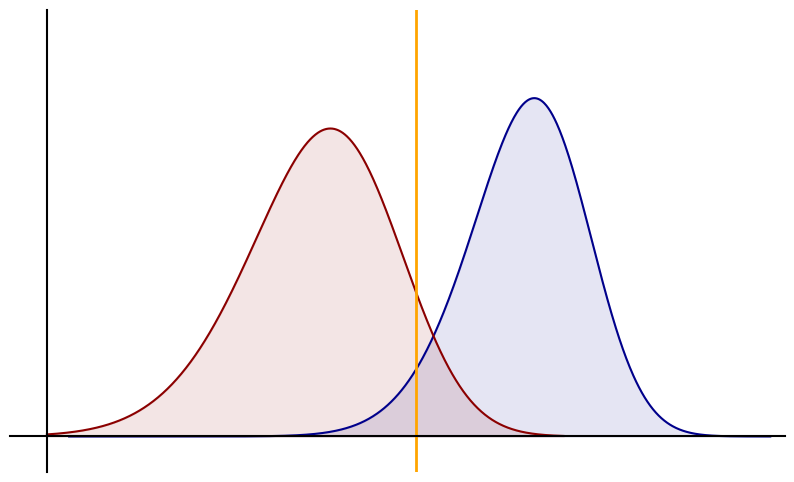

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# Parameters for the skew-normal distribution

x_lim_min_plot = 0
x_lim_max_plot = 5

### InD
# Generate data
location_ind = 3.6   # Location (shifts the peak)
scale_ind = 0.55      # Scale (controls the width)
alpha_ind = -1.5      # Skewness parameter (negative for left skew)
x_lim_min = x_lim_min_plot + 0.15
x_lim_max = x_lim_max_plot - 0.1
x_ind = np.linspace(x_lim_min, x_lim_max, 1000)
y_ind = skewnorm.pdf(x_ind, alpha_ind, location_ind, scale_ind)
y_ind /= y_ind.max() + 0.05  # Normalize

# OoD
location_ood = 2.3   # Location (shifts the peak)
scale_ood = 0.7      # Scale (controls the width)
alpha_ood = -1.5      # Skewness parameter (negative for left skew)
x_lim_min = 0
x_lim_max = 3.5
x_ood = np.linspace(x_lim_min, x_lim_max, 1000)
y_ood = skewnorm.pdf(x_ood, alpha_ood, location_ood, scale_ood)
y_ood /= y_ood.max() + 0.12  # Normalize


# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_ind, y_ind, color='darkblue')
ax.fill_between(x_ind, y_ind, color="darkblue", alpha=0.1)
ax.plot(x_ood, y_ood, color='darkred')
ax.fill_between(x_ood, y_ood, color="darkred", alpha=0.1)

# Threshold line
threshold = 2.5
plt.axvline(x=threshold, color='orange', linestyle='-', ymax=1.5, linewidth=2)  # Threshold line adjusted

# Remove grid lines, ticks, titles, and legend
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')

# Extend the X and Y axis lines to pass through the origin and go beyond it
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
# Make X and Y axis thicker
ax.spines['left'].set_linewidth(1.5)  # Thicker Y axis
ax.spines['bottom'].set_linewidth(1.5)  # Thicker X axis

# Set the axis limits
ax.set_xlim(-0.25, x_lim_max_plot)
ax.set_ylim(-0.10, 1.2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

name = "ood_thr"
#plt.savefig(f'{name}.pdf', bbox_inches='tight')
plt.savefig(f'{name}.png', dpi=300, bbox_inches='tight')

plt.show()

Threshold crossed
Spikes cleared: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0.8, 0.85]
Back to normal. Voltage: 0.0


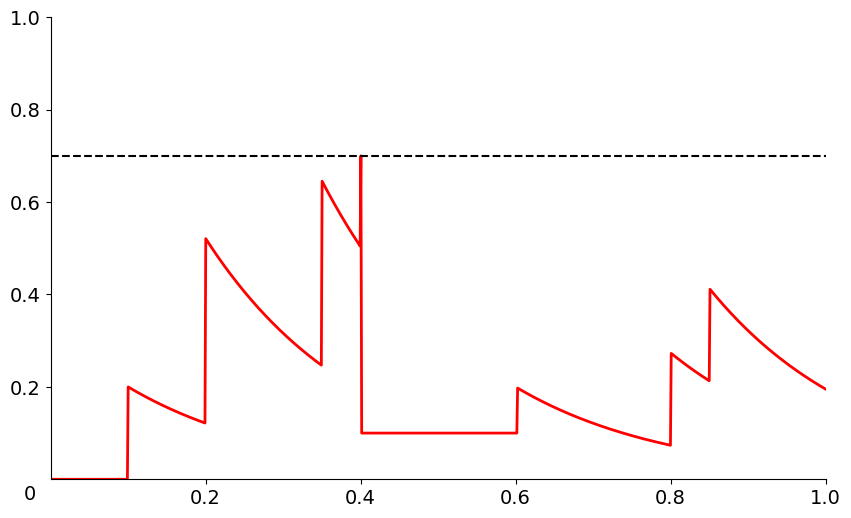

In [154]:
# Time axis
t = np.linspace(0, 1, 1000)

# Initialize the voltage trace
V = np.zeros_like(t)
threshold = 0.7
reset_value = 0.1
spike_increment = 0.2
decay_rate = 5.0

input_spike_times = [0.1, 0.2, 0.2, 0.35, 0.35, 0.4,0.4,0.4,0.4,0.4,0.6, 0.8, 0.85]

# Loop over the time array
first_voltage_over_threshold_state = False
reset_state = False
reset_counter = 0
reset_counter_max = 200

for i in range(len(t)):
    
    if not reset_state:
        # For each time step, loop over the input spike times and update the voltage
        for spike_time in input_spike_times:
            if t[i] >= spike_time and spike_time > 0:
                V[i] += spike_increment * np.exp(-decay_rate * (t[i] - spike_time))

        if V[i] > threshold:
            reset_state = True
            print("Threshold crossed")
            first_voltage_over_threshold_state = True
            reset_state = True
            reset_counter = 0
            V[i] = threshold
            # Clear previous spikes
            for _i in range(len(input_spike_times)):
                if t[i] >= input_spike_times[_i]:
                    input_spike_times[_i] = 0
            print('Spikes cleared:', input_spike_times)
    
    else:
        if reset_counter >= reset_counter_max:
            reset_state = False
            reset_counter = 0
            first_voltage_over_threshold_state = False
            print("Back to normal. Voltage:", V[i])
        else:
            reset_counter += 1
        V[i] = reset_value  # Apply the reset value       

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(10, 6))
ax.plot(t, V, color='red', lw=2)
ax.axhline(threshold, linestyle='--', color='black')
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

# Make ticks bigger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove x and y labels at zero
ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])

# Place diagonal zero
ax.annotate('0', xy=(0, 0), xytext=(-15, -15), textcoords='offset points', fontsize=14, ha='center')

plt.savefig('spiking_neuron.png', bbox_inches='tight', dpi=300)

plt.show()
